In [44]:
import os, sys
from Bio import SeqIO
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from os import path

In [2]:
ref_fasta= 'data_results/High_throughput_Homo_sapiens.fa'
seq_dict= SeqIO.to_dict(SeqIO.parse(open(ref_fasta), 'fasta'))

In [ ]:
from pprint import pprint
pprint(seq_dict)

In [20]:
len_list, pos_seq_list= [], []
for sil_key in seq_dict.keys():
    seq_str= str(seq_dict[sil_key].seq).upper()
    if len(seq_str) <= 300: 
        pos_seq_list.append(seq_str)
        len_list.append(len(seq_str))   

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0d4501d7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0d4501dda0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0d4501d588>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0d4502a390>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0d4502a668>],
 'means': []}

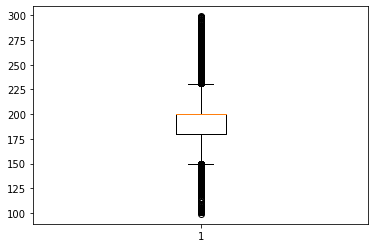

In [21]:
import matplotlib.pyplot as plt
plt.boxplot(len_list)

In [22]:
import numpy as np
np.percentile(len_list, 95)

235.89999999999964

In [23]:
print(len([elem for elem in len_list if elem <= 300]))

8283


In [24]:
8283/8572 # sequence length <= 300, accounts for 96.6% of total data

0.9662855809612693

In [25]:
print(len(len_list))

8283


In [ ]:
print(pos_seq_list)

In [27]:
# Taken from DNAbert's codebase - motif/motif_utils.py
def seq2kmer(seq, k):
    """
    Convert original sequence to kmers
    
    Arguments:
    seq -- str, original sequence.
    k -- int, kmer of length k specified.
    
    Returns:
    kmers -- str, kmers separated by space

    """
    kmer = [seq[x:x+k] for x in range(len(seq)+1-k)]
    kmers = " ".join(kmer)
    return kmers

In [30]:
data_seq_list, data_label_list= [], []
KMER= 6

for seq_elem in pos_seq_list:
    # Read the sequence file
    #pos_sequence = str(seq_dict[sil_id].seq)
    #print(pos_sequence, type(pos_sequence), len(pos_sequence))
    total_subseq= 20
    replace_subseq= 12

    # create a negative sequence corresponding to each positive sequence
    # divide it into 20 subsequences, and randomly select 12 subsequences and replace them with random values
    # since they are 300 bp in length, they are divisible by 20

    subseq_length= int(len(seq_elem)/total_subseq)
    #print('Subseq_length: ', subseq_length)
    random_subseq= []
    neg_sequence = seq_elem

    for i in range(replace_subseq):
        subseq_to_replace= ''.join(random.choices('CGTA', k=subseq_length))
        random_start_pos= random.randint(0, len(seq_elem)-1-subseq_length)
        neg_sequence= neg_sequence[:random_start_pos] + subseq_to_replace + neg_sequence[random_start_pos+subseq_length: ]

    #print('Positive sequence: ', pos_sequence, len(pos_sequence))
    #print('Negative sequence: ', neg_sequence, len(neg_sequence))

    data_seq_list.append(seq2kmer(seq_elem, KMER))
    data_label_list.append(1)

    data_seq_list.append(seq2kmer(neg_sequence, KMER))
    data_label_list.append(0)

In [31]:
print(len(data_seq_list))

16566


In [33]:
print(data_seq_list[1:10])

['CTAAAA TAAAAG AAAAGT AAAGTA AAGTAT AGTATC GTATCC TATCCC ATCCCT TCCCTG CCCTGT CCTGTG CTGTGT TGTGTG GTGTGA TGTGAC GTGACG TGACGC GACGCT ACGCTG CGCTGA GCTGAA CTGAAG TGAAGG GAAGGG AAGGGT AGGGTA GGGTAT GGTATT GTATTG TATTGT ATTGTA TTGTAG TGTAGT GTAGTA TAGTAT AGTATA GTATAT TATATC ATATCC TATCCA ATCCAG TCCAGA CCAGAC CAGACA AGACAG GACAGG ACAGGG CAGGGT AGGGTT GGGTTG GGTTGG GTTGGG TTGGGC TGGGCT GGGCTA GGCTAG GCTAGT CTAGTT TAGTTT AGTTTT GTTTTG TTTTGA TTTGAA TTGAAG TGAAGC GAAGCA AAGCAT AGCATT GCATTG CATTGG ATTGGA TTGGAA TGGAAC GGAACA GAACAC AACACG ACACGC CACGCC ACGCCC CGCCCT GCCCTT CCCTTA CCTTAT CTTATA TTATAC TATACC ATACCA TACCAG ACCAGA CCAGAT CAGATT AGATTT GATTTA ATTTAG TTTAGA TTAGAG TAGAGT AGAGTC GAGTCT AGTCTG GTCTGC TCTGCT CTGCTA TGCTAT GCTATG CTATGG TATGGA ATGGAA TGGAAT GGAATT GAATTG AATTGA ATTGAC TTGACA TGACAG GACAGA ACAGAT CAGATC AGATCC GATCCG ATCCGT TCCGTA CCGTAC CGTACC GTACCC TACCCT ACCCTT CCCTTT CCTTTC CTTTCA TTTCAG TTCAGC TCAGCG CAGCGG AGCGGT GCGGTT CGGTTT GGTTTG GTTTGG TTTGGC TTGGCT TGGC

In [35]:
print(data_label_list[1:10])

[0, 1, 0, 1, 0, 1, 0, 1, 0]


In [37]:
sil_data_df= pd.DataFrame({'sequence': data_seq_list, 'label': data_label_list})
sil_data_df.head()

,sequence,label
0,CTAAAA TAAAAG AAAAGT AAAGTA AAGTAT AGTATC GTAT...,1
1,CTAAAA TAAAAG AAAAGT AAAGTA AAGTAT AGTATC GTAT...,0
2,AAAGCA AAGCAG AGCAGG GCAGGG CAGGGA AGGGAC GGGA...,1
3,AAAGAA AAGAAC AGAACG GAACGC AACGCA ACGCAT CGCA...,0
4,AGCTAT GCTATA CTATAG TATAGT ATAGTG TAGTGT AGTG...,1


In [38]:
sil_data_df_shuffled = sil_data_df.sample(frac = 1)

In [39]:
sil_data_df_shuffled.head()

,sequence,label
299,GCTGCC CTGCCA TGCCAT GCCATG CCATGT CATGTT ATGT...,0
14490,CCCAGC CCAGCA CAGCAT AGCATT GCATTT CATTTT ATTT...,1
15416,TTGCCT TGCCTG GCCTGG CCTGGA CTGGAT TGGATG GGAT...,1
5322,TCTTGT CTTGTG TTGTGC TGTGCT GTGCTC TGCTCA GCTC...,1
12726,GAGGAC AGGACG GGACGA GACGAA ACGAAA CGAAAC GAAA...,1


In [40]:
sil_data_df_shuffled.to_csv('data_results/silencer_data_construction_1stNov2022.csv', index=False)

## Needs to divide the silencer dataset into training, validation and test dataset

In [45]:
#prom_df= pd.read_csv(data_file)
X_train, X_test, y_train, y_test= train_test_split(sil_data_df_shuffled.sequence, sil_data_df_shuffled.label, test_size=0.1, shuffle=True, random_state=42)
print(type(X_train), type(y_train))
train_df= pd.concat({'sequence': X_train, 'label': y_train}, axis=1)
test_df= pd.concat({'sequence': X_test, 'label': y_test}, axis=1)
print(train_df.shape, test_df.shape)
train_df.to_csv(path.join('data_results/', 'silencer_train.tsv'), sep='\t', index=False)
test_df.to_csv(path.join('data_results/', 'silencer_dev.tsv'), sep='\t', index=False)

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
(14909, 2) (1657, 2)
